# Clustering Random Data Using K-Means Clustering

The dataset we will use has 3000 entries with 3 clusters. So we already know the value of K.

In [1]:
%matplotlib inline
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [3]:
# importing the dataset
data = pd.read_csv(r'C:\projectdatasets\xclara.csv')
data.head()

,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729


In [4]:
print(data.shape)

(3000, 2)


In [5]:
# getting the values and plotting it
f1 = data['V1'].values
f2 = data['V2'].values
X = np.array(list(zip(f1, f2)))

In [6]:
X

array([[  2.072345,  -3.241693],
       [ 17.93671 ,  15.78481 ],
       [  1.083576,   7.319176],
       ...,
       [ 64.46532 , -10.50136 ],
       [ 90.72282 , -12.25584 ],
       [ 64.87976 , -24.87731 ]])

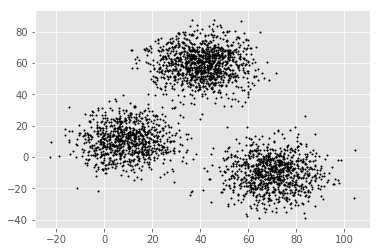

In [12]:
plt.scatter(f1, f2, c='black', s=2)

In [13]:
# Euclidean Distance Caculator
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

In [14]:
# number of clusters
k = 3

# X coordinates of random centroids
C_x = np.random.randint(0, np.max(X)-20, size=k)
# Y coordinates of random centroids
C_y = np.random.randint(0, np.max(X)-20, size=k)
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
print(C)

[[83. 49.]
 [36. 18.]
 [ 8. 32.]]


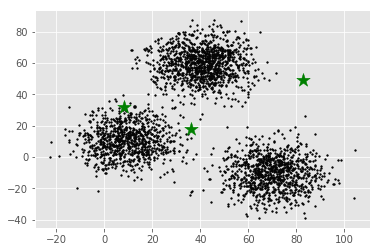

In [19]:
# plotting along with the Centroids
plt.scatter(f1, f2, c='#050505', s=3)
plt.scatter(C_x, C_y, marker='*', s=200, c='g')

In [20]:
# to store the value of centroids when it updates
C_old = np.zeros(C.shape)

# cluster lables(0, 1, 2)
clusters = np.zeros(len(X))

# error func. - distance between new centroids and old centroids
error = dist(C, C_old, None)

In [24]:
# loop will run until the error becomes zero

while error != 0:
    
    # assigning each value to its closest cluster
    for i in range(len(X)):
        distances = dist(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    
    # storing the old centroid values
    C_old = deepcopy(C)
    
    # finding the new centroids by taking the average value
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)

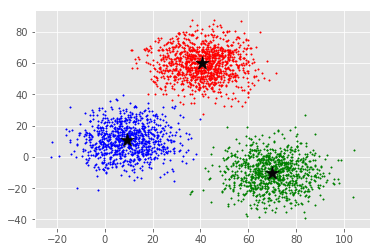

In [27]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=2, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')

From the visualization above, it is clear there are 3 clusters with black stars as their centroid